In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
from pylab import rcParams

%matplotlib inline

### **IMDb Datasets**

Subsets of IMDb data are available for access to customers for personal and non-commercial use. You can hold local copies of this data, and it is subject to our terms and conditions. Please refer to the [Non-Commercial Licensing](https://help.imdb.com/article/imdb/general-information/can-i-use-imdb-data-in-my-software/G5JTRESSHJBBHTGX?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=3aefe545-f8d3-4562-976a-e5eb47d1bb18&amp;pf_rd_r=C5Z70M2N900ND3CA6CAT&amp;pf_rd_s=center-1&amp;pf_rd_t=60601&amp;pf_rd_i=interfaces&amp;ref_=fea_mn_lk1) and [copyright/license](http://www.imdb.com/Copyright?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=3aefe545-f8d3-4562-976a-e5eb47d1bb18&amp;pf_rd_r=C5Z70M2N900ND3CA6CAT&amp;pf_rd_s=center-1&amp;pf_rd_t=60601&amp;pf_rd_i=interfaces&amp;ref_=fea_mn_lk2) and verify compliance.

**Data Location**

The dataset files can be accessed and downloaded from [https://datasets.imdbws.com/](https://www.imdb.com/offsite/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=3aefe545-f8d3-4562-976a-e5eb47d1bb18&amp;pf_rd_r=C5Z70M2N900ND3CA6CAT&amp;pf_rd_s=center-1&amp;pf_rd_t=60601&amp;pf_rd_i=interfaces&amp;page-action=offsite-imdbws&amp;token=BCYqjCgbxhvkkPZqvIDuKZraCiIzU4_zRcPbCXwwUCIaXN2hnfdasUG9HBE3n73r6wALAyCPfonV%0D%0Akjf8k3Y1O1CWQhCYs4XmdobRUcXM-h2JG2s4iVkTzfLrQlct2rDDA-5gFvg-dP5pawpBPca9hvEQ%0D%0AFWjS1McvWWO13OTSyme0m0cxC0-J6yvJ2RGGM75xTV1PQikR59ssSmGnEduhQksu4Q%0D%0A&amp;ref_=fea_mn_lk3). The data is refreshed daily.

**IMDb Dataset Details**

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A _&#39;\N&#39;_ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

**title.akas.tsv.gz** - Contains the following information for titles:

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: &quot;alternative&quot;, &quot;dvd&quot;, &quot;festival&quot;, &quot;tv&quot;, &quot;video&quot;, &quot;working&quot;, &quot;original&quot;, &quot;imdbDisplay&quot;. New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title

**title.basics.tsv.gz** - Contains the following information for titles:

- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- riginalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. &#39;\N&#39; for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

**title.crew.tsv.gz** – Contains the director and writer information for all the titles in IMDb. Fields include:

- tconst (string) - alphanumeric unique identifier of the title
- directors (array of nconsts) - director(s) of the given title
- writers (array of nconsts) – writer(s) of the given title

**title.episode.tsv.gz** – Contains the tv episode information. Fields include:

- tconst (string) - alphanumeric identifier of episode
- parentTconst (string) - alphanumeric identifier of the parent TV Series
- seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series

**title.principals.tsv.gz** – Contains the principal cast/crew for titles

- tconst (string) - alphanumeric unique identifier of the title
- rdering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else &#39;\N&#39;
- characters (string) - the name of the character played if applicable, else &#39;\N&#39;

**title.ratings.tsv.gz** – Contains the IMDb rating and votes information for titles

- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

**name.basics.tsv.gz** – Contains the following information for names:

- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else &#39;\N&#39;
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

#### Читаем данные из файла и отделяем фильмы с названием на "US" от фильмов с названиями на других языках и удаляем дубликаты по полю 'titleId'.

In [2]:
data_title_akas_tsv = pd.read_csv("./data/title.akas.tsv.gz", sep="\t", header=0, compression="gzip", low_memory=False)
data_us = data_title_akas_tsv[data_title_akas_tsv.region=="US"].copy()
data_us.drop_duplicates(subset ="titleId", keep = False, inplace = True)
data_NOT_us = data_title_akas_tsv[data_title_akas_tsv.region!="US"].copy()
data_NOT_us.drop_duplicates(subset ="titleId", keep = False, inplace = True)
del data_title_akas_tsv

#### Объединяем названия фильмов, таким образом чтобы сохранились все фильмы с названиями на "US" и добавились фильмы с названиями на других языках, но которых нет с названием на "US"

In [3]:
# Медленный способ, слишком долго ждать результат. Актуально только для небольших выборок
# data_both = pd.concat([data_us, data_NOT_us[~np.in1d(data_NOT_us['titleId'], data_us['titleId'])]], ignore_index=True)

# Быстрый способ. То что нужно.
data_title_akas = pd.concat([data_us, data_NOT_us]).drop_duplicates(subset='titleId', keep='first').reset_index(drop=True)
del data_us
del data_NOT_us

#### Загружаем дополнительные данные и объединяем их с имеющимися по полю "titleId"

In [4]:
data_title_basics_tsv = pd.read_csv("./data/title.basics.tsv.gz", sep="\t", header=0, compression="gzip")
data_title_basics_tsv.rename(columns={"tconst": "titleId"}, inplace=True)
more_data = pd.merge(data_title_akas, data_title_basics_tsv, on="titleId")
del data_title_akas
del data_title_basics_tsv

#### Загружаем данные с рейтингами и объединяем их с имеющимися данными по полю "titleId"

In [5]:
data_title_ratings_tsv = pd.read_csv("./data/title.ratings.tsv.gz", sep="\t", header=0, compression="gzip")
data_title_ratings_tsv.rename(columns={"tconst": "titleId"}, inplace=True)
full_data = pd.merge(more_data, data_title_ratings_tsv, on="titleId")
del more_data
del data_title_ratings_tsv

#### Так как предметом изучения в работе являются фильмы жанра "Комедия", отсечем остальные данные из датасэта

In [6]:
full_data.drop(columns=["ordering"], inplace=True)
full_data.drop(columns=["language"], inplace=True)
full_data.drop(columns=["types"], inplace=True)
full_data.drop(columns=["attributes"], inplace=True)
full_data.drop(columns=["isOriginalTitle"], inplace=True)
full_data.drop(columns=["isAdult"], inplace=True)
full_data.drop(columns=["endYear"], inplace=True)
full_data = full_data[full_data.genres.str.contains("Comedy")]

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140600 entries, 12 to 479891
Data columns (total 11 columns):
titleId           140600 non-null object
title             140600 non-null object
region            140600 non-null object
titleType         140600 non-null object
primaryTitle      140600 non-null object
originalTitle     140600 non-null object
startYear         140600 non-null object
runtimeMinutes    140600 non-null object
genres            140600 non-null object
averageRating     140600 non-null float64
numVotes          140600 non-null int64
dtypes: float64(1), int64(1), object(9)
memory usage: 12.9+ MB


In [8]:
full_data = full_data[full_data.startYear!='\\N']
full_data.startYear = full_data.startYear.astype(np.int64)

In [9]:
full_data = full_data[full_data.runtimeMinutes!='\\N']
full_data.runtimeMinutes = full_data.runtimeMinutes.astype(np.int64)

In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108101 entries, 12 to 479891
Data columns (total 11 columns):
titleId           108101 non-null object
title             108101 non-null object
region            108101 non-null object
titleType         108101 non-null object
primaryTitle      108101 non-null object
originalTitle     108101 non-null object
startYear         108101 non-null int64
runtimeMinutes    108101 non-null int64
genres            108101 non-null object
averageRating     108101 non-null float64
numVotes          108101 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 9.9+ MB


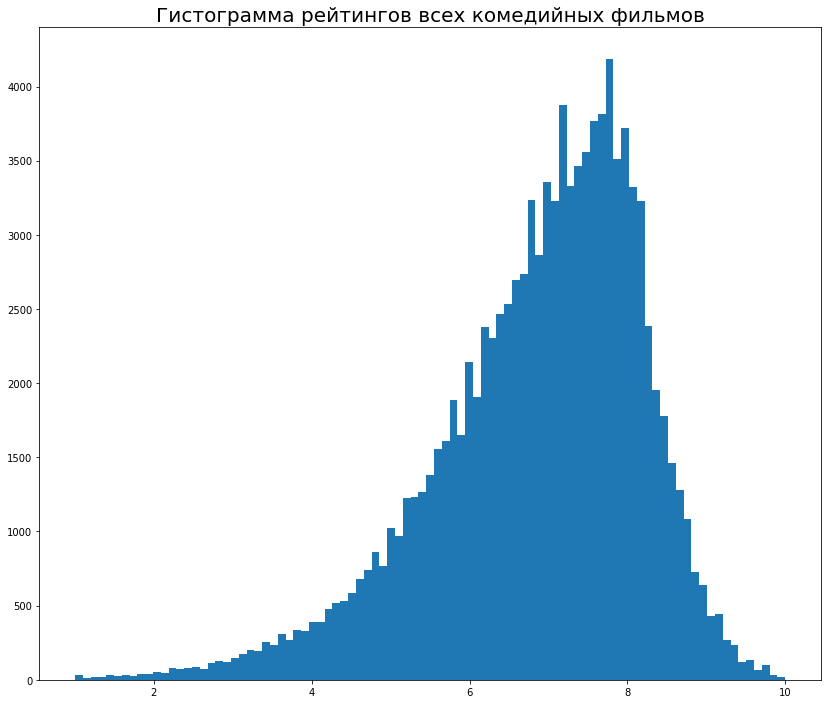

In [11]:
rcParams['figure.figsize'] = 14, 12
plt.hist(full_data.averageRating, bins=len(full_data.averageRating.unique().tolist()))
plt.title("Гистограмма рейтингов всех комедийных фильмов", fontsize=20)
plt.show()

In [12]:
print("Average rating (mean/median/mode):")
print(full_data.averageRating.mean())
print(full_data.averageRating.median())
print(full_data.averageRating.mode())

Average rating (mean/median/mode):
6.887041747994757
7.1
0    7.8
dtype: float64


#### На гистограмме видно, что многие комедии (за все время) имеют оценку ~7.8 баллов. Количество значений рейтинга выше 7.8 идет резко по убыванию.

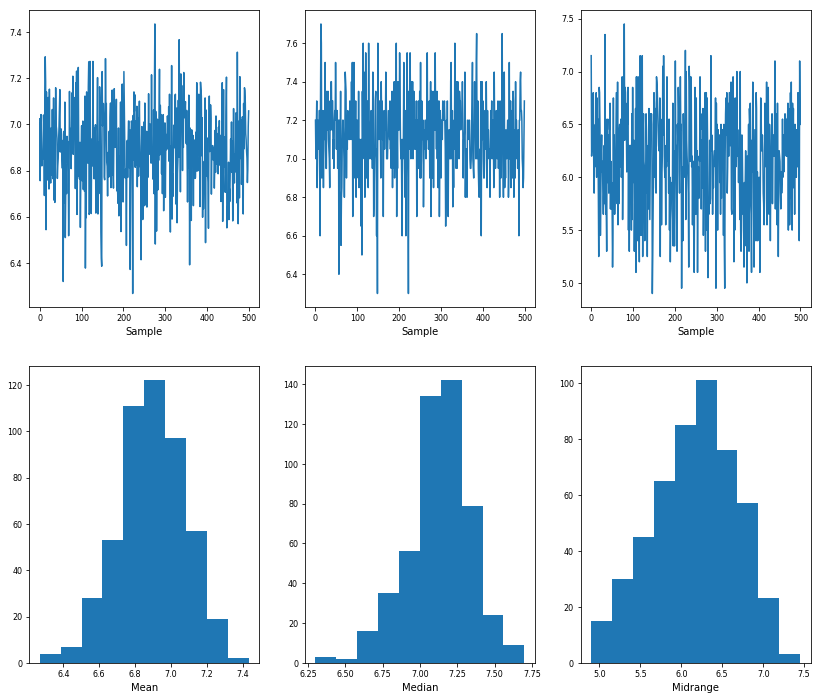

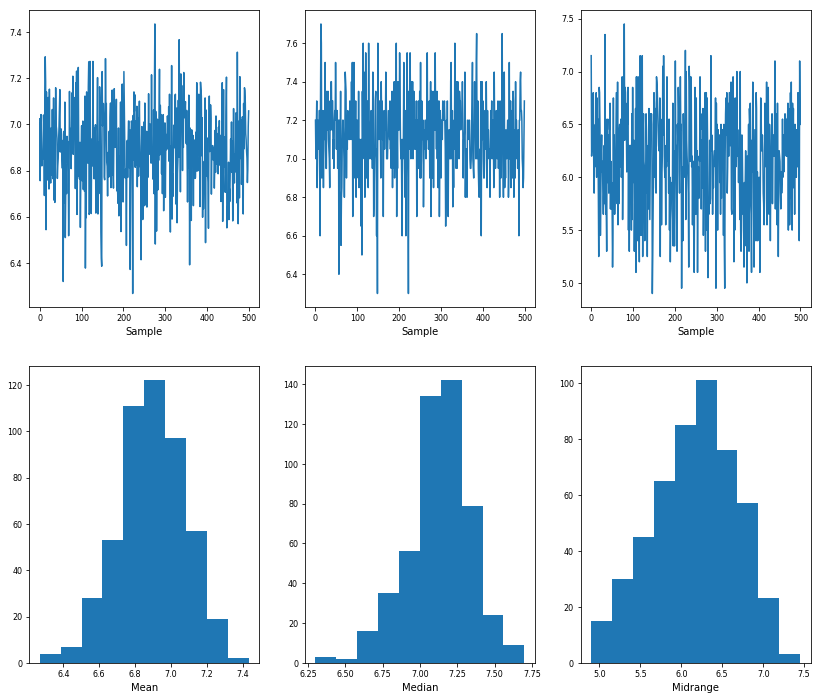

In [13]:
pd.plotting.bootstrap_plot(full_data.averageRating)

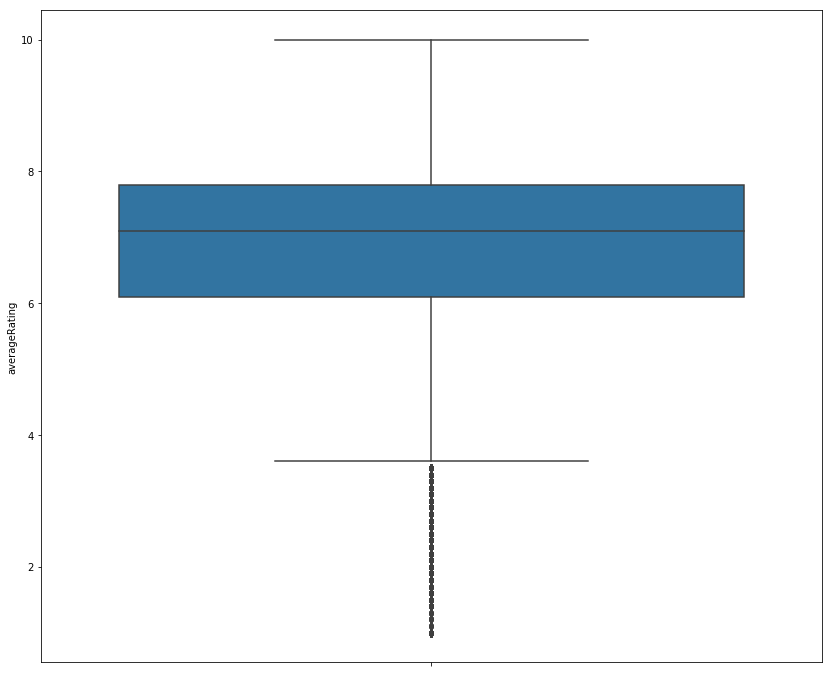

In [14]:
sns.boxplot(full_data.averageRating, orient='v');

Здесь мы видим, что количество "выбросов" комедий с низким рейтингом, гораздо больше "выбросов" с высоким рейтингом.

#### Рассмотрим количество созданных комедий в разные годы:

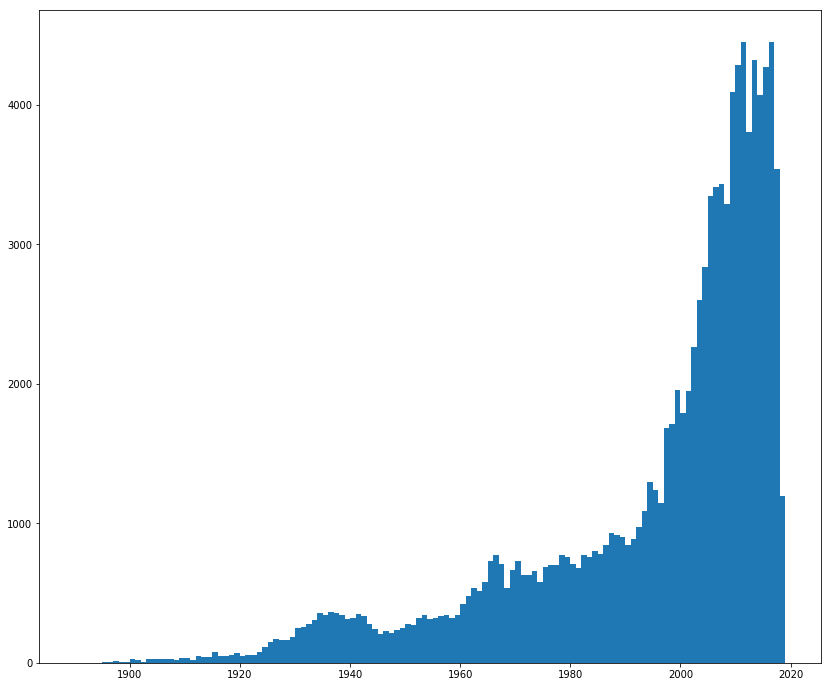

In [15]:
now = datetime.datetime.now()
rcParams['figure.figsize'] = 14, 12
plt.hist(full_data.startYear, bins=now.year-full_data.startYear.min())
plt.show()

#### На гистограмме четко видно, что количество ежегодно производимых комедий начинает резко возрастать начиная с ~2000 года.

#### Рассмотрим число произведенных комедий по годам, разделяя по типам:

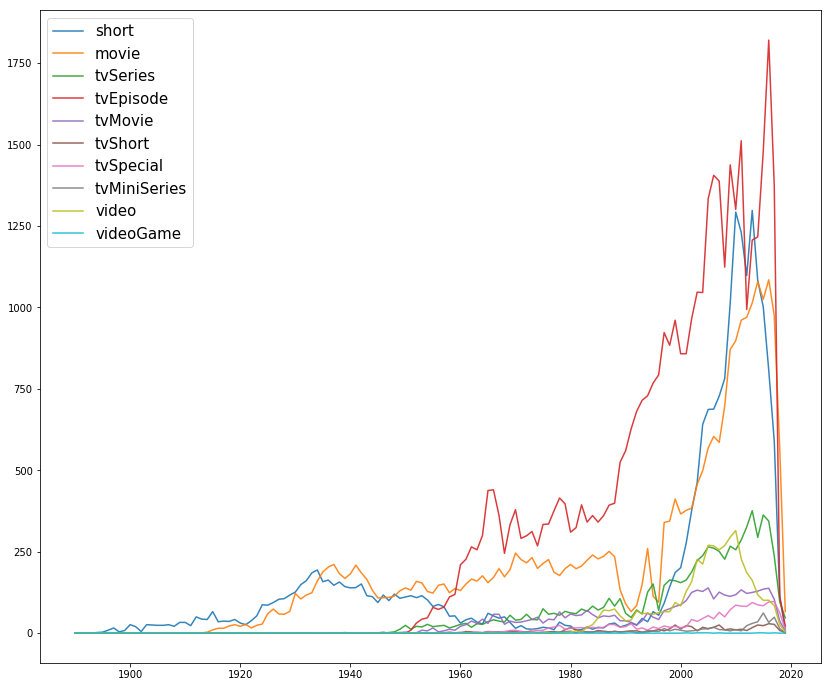

In [16]:
rcParams['figure.figsize'] = 14, 12

titleTypes_count = {}
years = np.arange(full_data.startYear.min(), full_data.startYear.max()+1)
for titleType in full_data.titleType.unique().tolist():
    titleTypes_count[titleType] = Counter()
    for year in years:
        titleTypes_count[titleType][year] = len(full_data[(full_data.startYear==year) & (full_data.titleType==titleType)])
    plt.plot(years, titleTypes_count[titleType].values(), alpha=0.9, label=titleType)
legend_dict = {'size': 15}
plt.legend(loc='upper left', prop=legend_dict)
plt.show()

#### То же самое, но рассматриваемый шаг возьмем за пять лет, а не ежегодный (для более плавного графика)

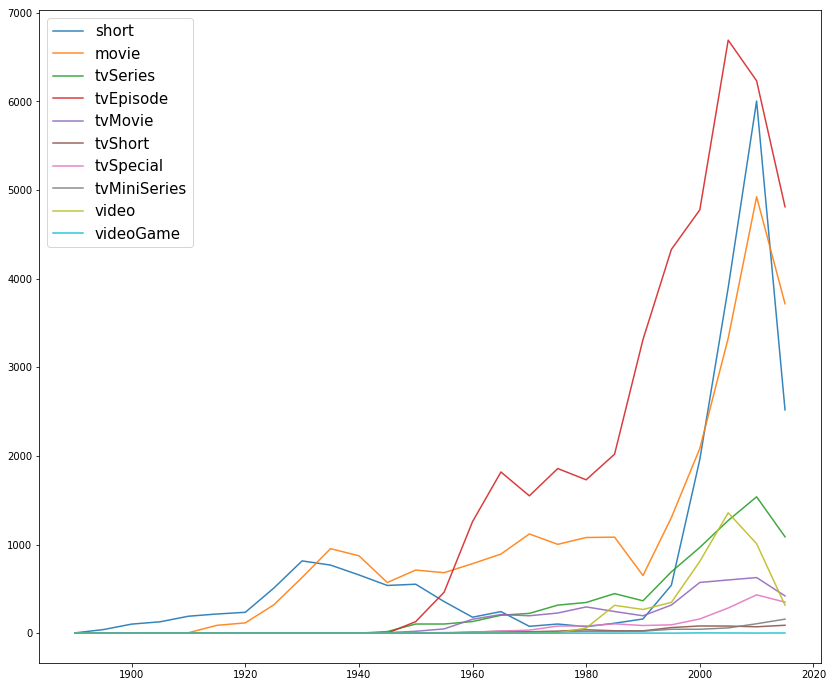

In [17]:
rcParams['figure.figsize'] = 14, 12
titleTypes_count = {}
step = 5
years = np.arange(full_data.startYear.min(), full_data.startYear.max()+1, step)
for titleType in full_data.titleType.unique().tolist():
    titleTypes_count[titleType] = Counter()
    for year in years:
        titleTypes_count[titleType][year] = len(full_data[(full_data.startYear>=year) & (full_data.startYear<year+step) & (full_data.titleType==titleType)])
    plt.plot(years, titleTypes_count[titleType].values(), alpha=0.9, label=titleType)
legend_dict = {'size': 15}
plt.legend(loc='upper left', prop=legend_dict)
plt.show()

#### Последние графики показывают, что значительное увеличение количества комедий связано с тем, что несколько типов показали ощутимый рост.

#### Рассмотрим средний рейтинг фильмов по годам

In [18]:
years = np.arange(full_data.startYear.min(), full_data.startYear.max()+1)
mean_ratings = [0] * len(years)
mean_voters = [0] * len(years)
for i, year in enumerate(years):
    mean_ratings[i] = full_data[full_data.startYear==year].averageRating.mean()
    mean_voters[i] = full_data[full_data.startYear==year].numVotes.mean()

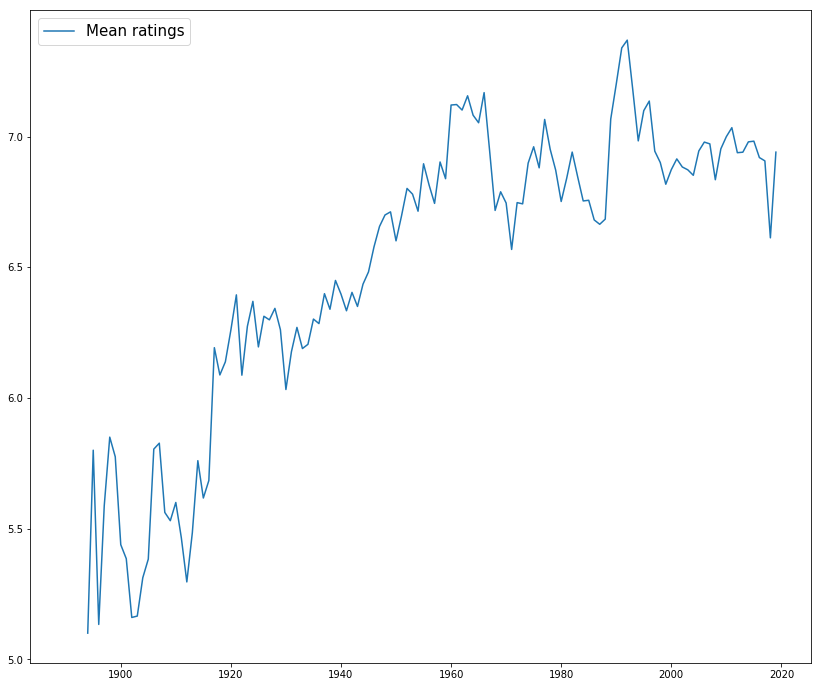

In [19]:
rcParams['figure.figsize'] = 14, 12
plt.plot(years, mean_ratings, alpha=1, label="Mean ratings")
legend_dict = {'size': 15}
plt.legend(loc='upper left', prop=legend_dict)
plt.show()

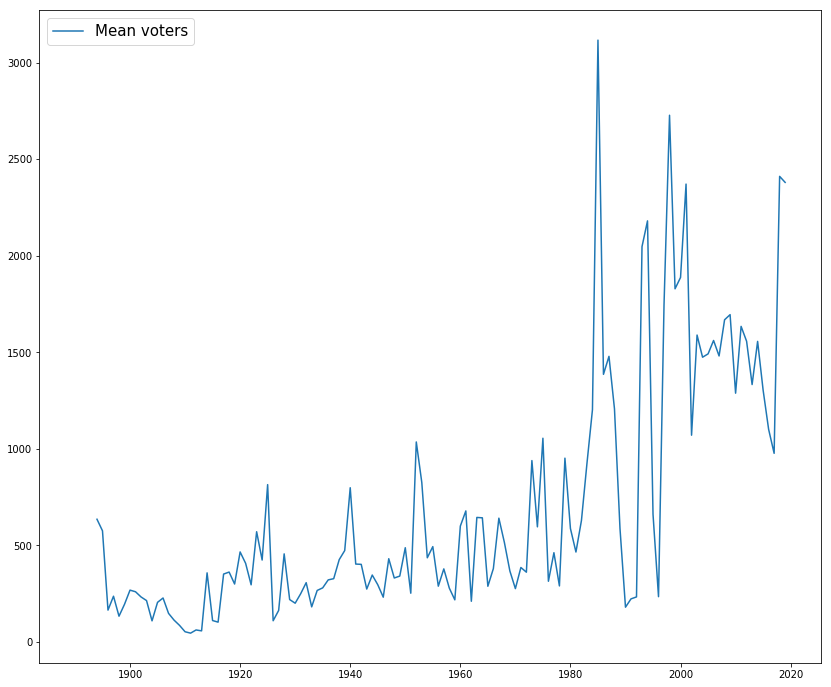

In [20]:
rcParams['figure.figsize'] = 14, 12
plt.plot(years, mean_voters, alpha=1, label="Mean voters")
legend_dict = {'size': 15}
plt.legend(loc='upper left', prop=legend_dict)
plt.show()

#### Средняя оценка для старых фильмов ниже чем для более новых, но в то же время количество проголосовавших за новые фильмы значительно выше само по себе. Это косвенно может говорить о том, что аудитория, которая оценивала старые фильмы была более придирчива, так как, возможно, это более возрастная аудитория. Или же наоборот, молодая аудитория, которая значительно чаще пользуется Интернетом, не оценила должным образом старые фильмы, которые, через призму современных реалий могут недотягивать по качеству декораций, съемки и т.п., но что в свое время было актуально.

#### Рассмотри корреляцию признаков:

In [21]:
correlation = full_data.corr(method='pearson')
columns = correlation.nlargest(10, 'averageRating').index
columns

Index(['averageRating', 'startYear', 'numVotes', 'runtimeMinutes'], dtype='object')

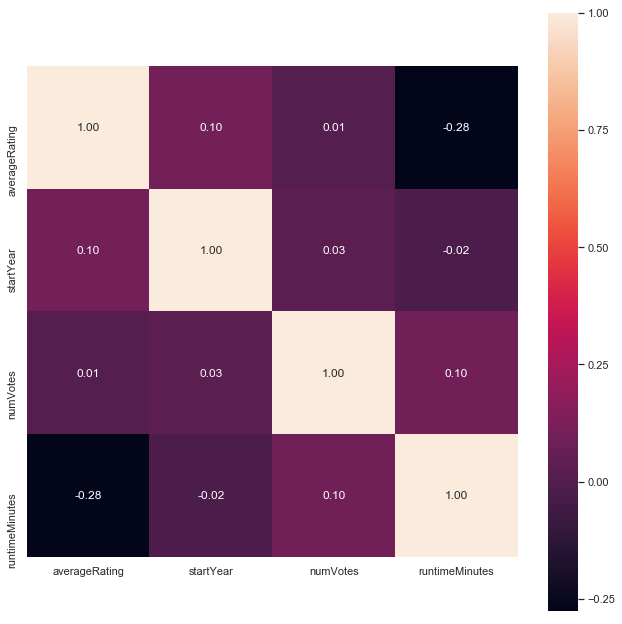

In [22]:

sns.set(rc={'figure.figsize':(11.,11.)})
correlation_map = np.corrcoef(full_data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

#### Между годом выпуска комедии и ее рейтингом корреляция практически минимальна, но зато можно наблюдать интересную отрицательную корреляцию между продолжительностью фильма и его рейтингом, что говорит о том, что для комедийных фильмов желательно не выходить за пределы средней продолжительности фильма. Считаю, что это может быть связано с тем, что люди, желающие посмотреть комедийный фильм, хотят расслабиться и весело провести время, а более продолжительные фильмы утомляют, что может оказать негативное влияние на общее впечатление о фильме.

#### В датасете отсутствует информация о стране производства фильмов. Есть только информация о различных локализованных версиях (например есть несколько записей для одного и того же titleId, но разный region, так как для разных стран свое локализованное название и т.п.), поэтому рассмотреть какое-то исследование по странам не представляется возможным, к сожалению. Если бы подобная информация была, можно бы было рассмотреть какие страны являются общими лидерами по производству комедий, оценить этот же параметр по годам, посмотреть рейтинги комедий каких стран в среднем являются более высокими чем остальные или же они одинаковы.

### В целом хотелось бы сказать, что настолько сильно творческие работы мне не очень хорошо даются и не очень нравятся. Предпочитаю решать более четко поставленные задачи, как, например, это было с курсовой "Python для DataScience". Поэтому буду доволен зачету на любую оценку.